In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from matplotlib import colors
from scipy.stats import zscore
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import scipy.stats
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Encoding the "test preparation course" column into integers. This makes "none" = 0 and "completed" = 1

In [4]:
df['test preparation course'], tpcValues = pd.factorize(df['test preparation course'])

In [5]:
dfMath = df.iloc[:,4:6] #extract only the columns I care about

In [92]:
dfMath

,test preparation course,math score
0,0,72
1,1,69
2,0,90
3,0,47
4,0,76
...,...,...
995,1,88
996,0,62
997,1,59
998,1,68


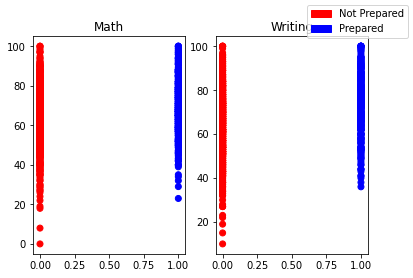

In [6]:
fig, ax = plt.subplots(1,2)
colors = ['r' if x == 0 else 'b' for x in df['test preparation course'] ]
ax[0].scatter(y=df["math score"],x=df["test preparation course"], c=colors)
ax[0].set_title("Math")
ax[1].scatter(y=df["writing score"],x=df["test preparation course"], c=colors)
ax[1].set_title("Writing")
red_patch = mpatches.Patch(color='r',label="Not Prepared")
blue_patch = mpatches.Patch(color='b',label='Prepared')
fig.legend(handles=[red_patch,blue_patch])

In [7]:
prepared = df.loc[df["test preparation course"] == 1]
unprepared = df.loc[df['test preparation course'] == 0]
print("Unprepared Shape: ",unprepared.shape)
print("Prepared Shape: ",prepared.shape)
print('\n------- Prepared Mean')
print(prepared.mean())
print('\n------- UnPrepared Mean')
print(unprepared.mean())
print('\n------- Prepared STD')
print(prepared.std())
print('\n------- UnPrepared STD')
print(unprepared.std())

Unprepared Shape:  (642, 8)
Prepared Shape:  (358, 8)

------- Prepared Mean
test preparation course     1.000000
math score                 69.695531
reading score              73.893855
writing score              74.418994
dtype: float64

------- UnPrepared Mean
test preparation course     0.000000
math score                 64.077882
reading score              66.534268
writing score              64.504673
dtype: float64

------- Prepared STD
test preparation course     0.000000
math score                 14.444699
reading score              13.638384
writing score              13.375335
dtype: float64

------- UnPrepared STD
test preparation course     0.000000
math score                 15.192376
reading score              14.463885
writing score              14.999661
dtype: float64


In [149]:
#Z Score Normalization
numeric_cols = df.select_dtypes(include=[np.number]).columns
zun = unprepared[numeric_cols].apply(zscore)
zp = prepared[numeric_cols].apply(zscore)
# alpha = 0.05, only the prepared math score is normally distrbuted. I'm still going to assume everything is normal 
a,ws_zun_shapiro = shapiro(zun["writing score"])
a,ws_zp_shapiro = shapiro(zp["writing score"])
a,ms_zun_shapiro = shapiro(zun["math score"])
a,ms_zp_shapiro = shapiro(zp["math score"])
print(ws_zun_shapiro)
print(ws_zp_shapiro)
print(ms_zun_shapiro)
print(ms_zp_shapiro)

(642, 8)
(358, 8)


In [8]:
print("Math Score ",ttest_ind(unprepared['math score'],prepared['math score'],equal_var=True))
print("Writing Score ",ttest_ind(unprepared['writing score'],prepared['writing score'],equal_var=True))

Math Score  Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
Writing Score  Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


In [241]:
def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data) #convert to numpy array
    n = len(a) # capture length
    m, se = np.mean(a), scipy.stats.sem(a) #compute mean and standard error (sample stand deviation / sample size = standard error)
    st = scipy.stats.t.ppf((1 + confidence) / 2., n-1) #calculates student t distribution value given sample size and confidence
    h = se * st
    return m-h, m+h

print("Prepared Math CI: ", mean_confidence_interval(prepared['math score']))
print("UnPrepared Math CI: ", mean_confidence_interval(unprepared['math score']))
print("Prepared Writing CI: ", mean_confidence_interval(prepared['writing score']))
print("UnPrepared Writing CI: ", mean_confidence_interval(unprepared['writing score']))

Prepared Math CI:  (68.1941531829944, 71.19690826951958)
UnPrepared Math CI:  (62.900473384144874, 65.25528985573052)
Prepared Writing CI:  (73.02876627127047, 75.80922255554516)
UnPrepared Writing CI:  (63.342200015173695, 65.66714577921881)


In [9]:
75.8 - 63.3

12.5

In [10]:
68.2 - 65.3

2.9000000000000057